In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
data = pd.read_csv('E:\\study\\tensorflow\\data\\PRSA_data_2010.1.1-2014.12.31.csv')

In [78]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [80]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [81]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [82]:
data['pm2.5'].isna().sum()

2067

In [83]:
#用前一天的数据填充nan
data = data.iloc[24:].copy().fillna(method='ffill')

In [84]:
data['pm2.5'].isna().sum()

0

In [85]:
import datetime

In [86]:
data['tm'] = data.apply(
    lambda x:datetime.datetime(
        year=x['year'],
        month=x['month'],
        day=x['day'],
        hour=x['hour']
    ),
    axis=1
)

In [87]:
data.drop(columns=['year','month','day','hour','No'],inplace=True)

In [88]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [89]:
data.set_index('tm',inplace=True)

In [91]:
data.index

DatetimeIndex(['2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-02 08:00:00', '2010-01-02 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='tm', length=43800, freq=None)

In [92]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [93]:
data = data.join(pd.get_dummies(data.cbwd))

In [94]:
del data['cbwd']

In [95]:
data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


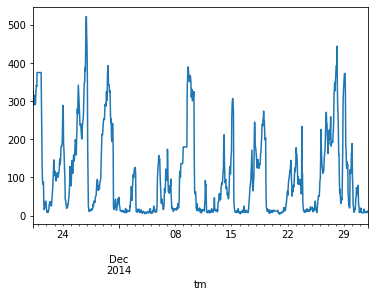

In [96]:
data['pm2.5'][-1000:].plot()

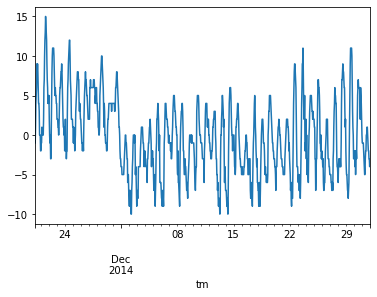

In [98]:
data['TEMP'][-1000:].plot()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
pm2.5    43800 non-null float64
DEWP     43800 non-null int64
TEMP     43800 non-null float64
PRES     43800 non-null float64
Iws      43800 non-null float64
Is       43800 non-null int64
Ir       43800 non-null int64
NE       43800 non-null uint8
NW       43800 non-null uint8
SE       43800 non-null uint8
cv       43800 non-null uint8
dtypes: float64(4), int64(3), uint8(4)
memory usage: 4.1 MB


In [100]:
seq_length = 5 * 24
delay = 24

In [101]:
data_ = []
for i in range(len(data) - seq_length - delay):
    data_.append(data.iloc[i:i+seq_length+delay])

In [102]:
data_[0].shape

(144, 11)

In [103]:
data_ = np.array([df.values for df in data_])

In [104]:
data_.shape

(43656, 144, 11)

In [105]:
np.random.shuffle(data_)

In [106]:
x = data_[:,:-delay,:]
y = data_[:,-1,0]

In [107]:
split_b = int(data_.shape[0]*0.8)

In [108]:
split_b

34924

In [109]:
train_x = x[:split_b]
train_y = y[:split_b]
test_x = x[split_b:]
test_y = y[split_b:]

In [110]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((34924, 120, 11), (8732, 120, 11), (34924,), (8732,))

In [111]:
mean = train_x.mean(axis=0)
std = train_y.std(axis=0)

In [112]:
mean.shape

(120, 11)

In [113]:
train_x = (train_x - mean)/std
test_x = (test_x - mean)/std

In [114]:
batch_size = 128

In [115]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

In [118]:
train_x.shape[1:]

(120, 11)

In [121]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [120]:
history = model.fit(train_x,train_y,epochs=20,batch_size=batch_size,validation_data=(test_x,test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/20
34924/34924 [==============================] - 1s 24us/sample - loss: 56.4780 - val_loss: 56.3976
Epoch 2/20
34924/34924 [==============================] - 1s 18us/sample - loss: 56.0370 - val_loss: 56.0831
Epoch 3/20
34924/34924 [==============================] - 1s 17us/sample - loss: 55.7416 - val_loss: 55.9262
Epoch 4/20
34924/34924 [==============================] - 1s 17us/sample - loss: 55.5090 - val_loss: 55.7675
Epoch 5/20
34924/34924 [==============================] - 1s 16us/sample - loss: 55.3014 - val_loss: 55.6246
Epoch 6/20
34924/34924 [==============================] - 1s 18us/sample - loss: 55.0974 - val_loss: 55.4813
Epoch 7/20
34924/34924 [==============================] - 1s 17us/sample - loss: 54.9107 - val_loss: 55.4250
Epoch 8/20
25984/34924 [=====================>........] - ETA: 0s - loss: 54.3544

KeyboardInterrupt: 

In [49]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

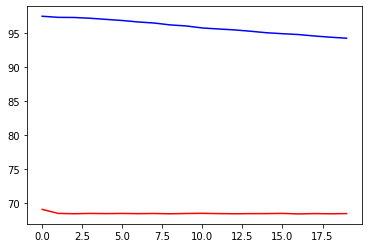

In [53]:
plt.plot(history.epoch,history.history.get('mae'),c='r')
plt.plot(history.epoch,history.history.get('val_mae'),c='b')

# LSTM

In [57]:
model = keras.Sequential()
model.add(layers.LSTM(32,input_shape=(120,11)))
model.add(layers.Dense(1))

In [58]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [59]:
history = model.fit(train_x,train_y,epochs=150,batch_size=batch_size,validation_data=(test_x,test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/150
34924/34924 [==============================] - 11s 313us/sample - loss: 16424.4473 - mae: 90.0050 - val_loss: 17721.8220 - val_mae: 96.3440
Epoch 2/150
34924/34924 [==============================] - 9s 268us/sample - loss: 14530.1292 - mae: 80.9319 - val_loss: 16897.0153 - val_mae: 92.0142
Epoch 3/150
34924/34924 [==============================] - 9s 266us/sample - loss: 13273.6744 - mae: 75.9783 - val_loss: 16189.4783 - val_mae: 88.7871
Epoch 4/150
34924/34924 [==============================] - 9s 263us/sample - loss: 12242.3959 - mae: 72.3887 - val_loss: 15568.2857 - val_mae: 86.1666
Epoch 5/150
34924/34924 [==============================] - 9s 266us/sample - loss: 11386.6050 - mae: 69.6968 - val_loss: 15075.9975 - val_mae: 84.2246
Epoch 6/150
34924/34924 [==============================] - 9s 264us/sample - loss: 10680.2530 - mae: 67.8035 - val_loss: 14641.6895 - val_mae: 82.6399
Epoch 7/150
34924/34924 [===================

KeyboardInterrupt: 

# LSTM优化

In [123]:
model = keras.Sequential()
model.add(layers.LSTM(32,input_shape=(train_x.shape[1:]),return_sequences=True))#return_sequences,使LSTM可堆叠
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [124]:
learn_rate_reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lr=0.000001)

In [125]:
model.compile(optimizer='adam',
             loss='mae',
             metrics=['mse'])

In [126]:
history = model.fit(train_x,train_y,epochs=150,batch_size=batch_size,validation_data=(test_x,test_y),callbacks=[learn_rate_reduce])

Train on 34924 samples, validate on 8732 samples
Epoch 1/150
 5632/34924 [===>..........................] - ETA: 56s - loss: 94.2942 - mse: 17094.5605WARNING:tensorflow:Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,mse,lr


KeyboardInterrupt: 